# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the `whale_analysis.ipynb` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [40]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlibinline

UsageError: Line magic function `%matplotlibinline` not found.


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [41]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
whale_navs_path = Path("./Resources/whale_navs.csv")
whale_navs_df = pd.read_csv(whale_navs_path,
                            index_col = "date",
                            parse_dates = True,
                            infer_datetime_format = True)

whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [42]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
daily_returns_df = whale_navs_df.pct_change().dropna()
# Review the first five rows of the daily returns DataFrame.
daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

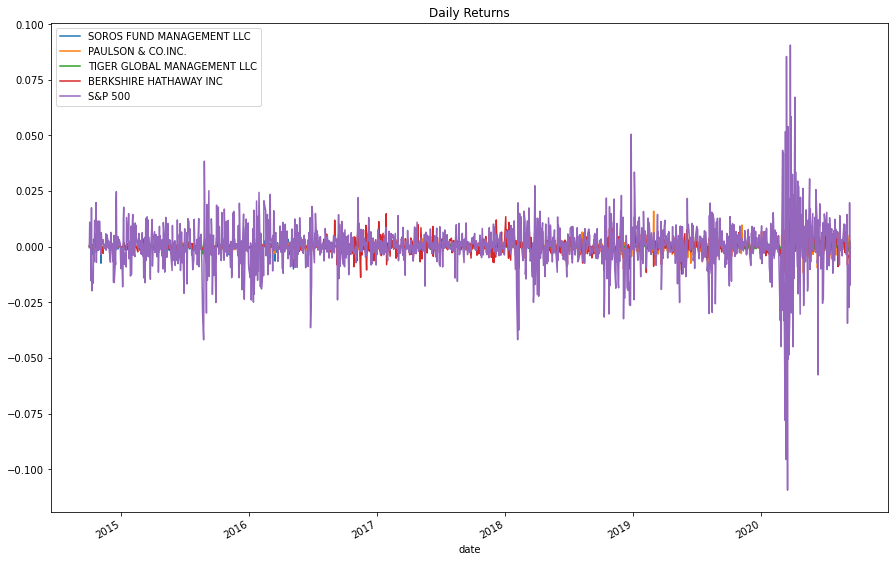

In [43]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns_df.plot(figsize=(15,10), legend = True, title="Daily Returns")

<AxesSubplot:title={'center':"SOROS FUND MANAGEMENT LLC's daily returns"}, xlabel='date'>

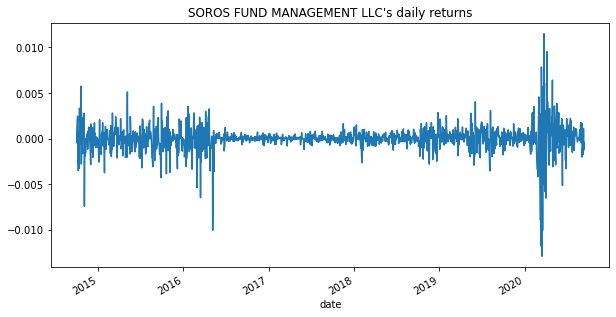

In [44]:
daily_returns_df["SOROS FUND MANAGEMENT LLC"].plot(figsize=(10,5), title="SOROS FUND MANAGEMENT LLC's daily returns")

<AxesSubplot:title={'center':"PAULSON & CO.INC.'s daily returns"}, xlabel='date'>

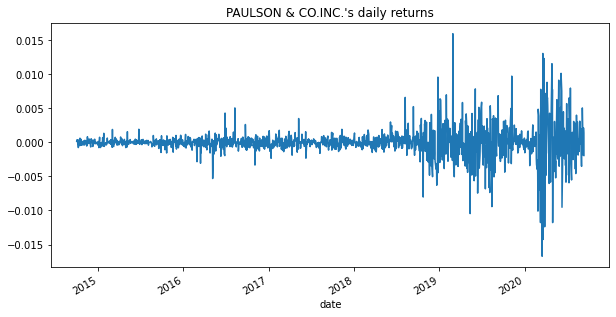

In [45]:
daily_returns_df["PAULSON & CO.INC."].plot(figsize=(10,5), title="PAULSON & CO.INC.'s daily returns")

<AxesSubplot:title={'center':"TIGER GLOBAL MANAGEMENT LLC's daily returns"}, xlabel='date'>

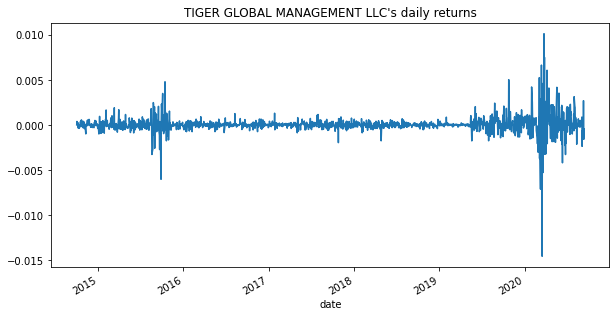

In [46]:
daily_returns_df["TIGER GLOBAL MANAGEMENT LLC"].plot(figsize=(10,5), title="TIGER GLOBAL MANAGEMENT LLC's daily returns")

<AxesSubplot:title={'center':"BERKSHIRE HATHAWAY INC's daily returns"}, xlabel='date'>

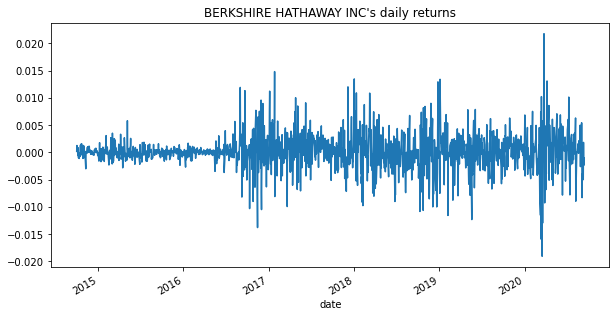

In [47]:
daily_returns_df["BERKSHIRE HATHAWAY INC"].plot(figsize=(10,5), title="BERKSHIRE HATHAWAY INC's daily returns")

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [48]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1+daily_returns_df).cumprod()
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Returns - Growth of initial investment of $1'}, xlabel='date'>

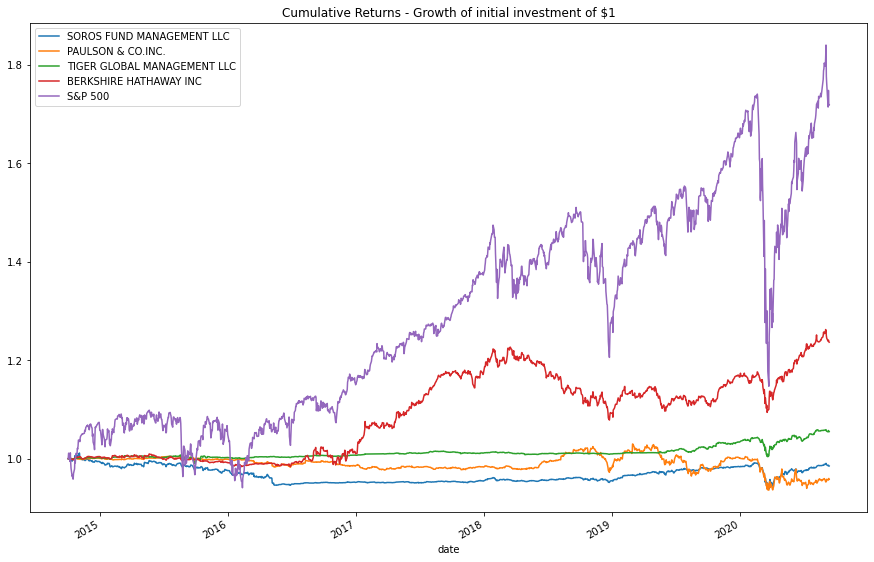

In [51]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(figsize=(15,10),
                        legend = True,
                        title="Cumulative Returns - Growth of initial investment of $1")

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # No, overall, all the stocks significantly underperform the S&P 500 index in the time period. Soros and Paulson clearly lose money in this time period. Tiger returns are 5.51% and Berkshire returns are 23.66% while that of S&P 500 are 71.89%. S&P 500 clearly outperforms the other funds and should definitely be part of any portfolio. The best performer among the non-S&P 500 funds is Berkshire with 23.66% return in this perfiod.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns of 4 Funds and S&P 500'}>

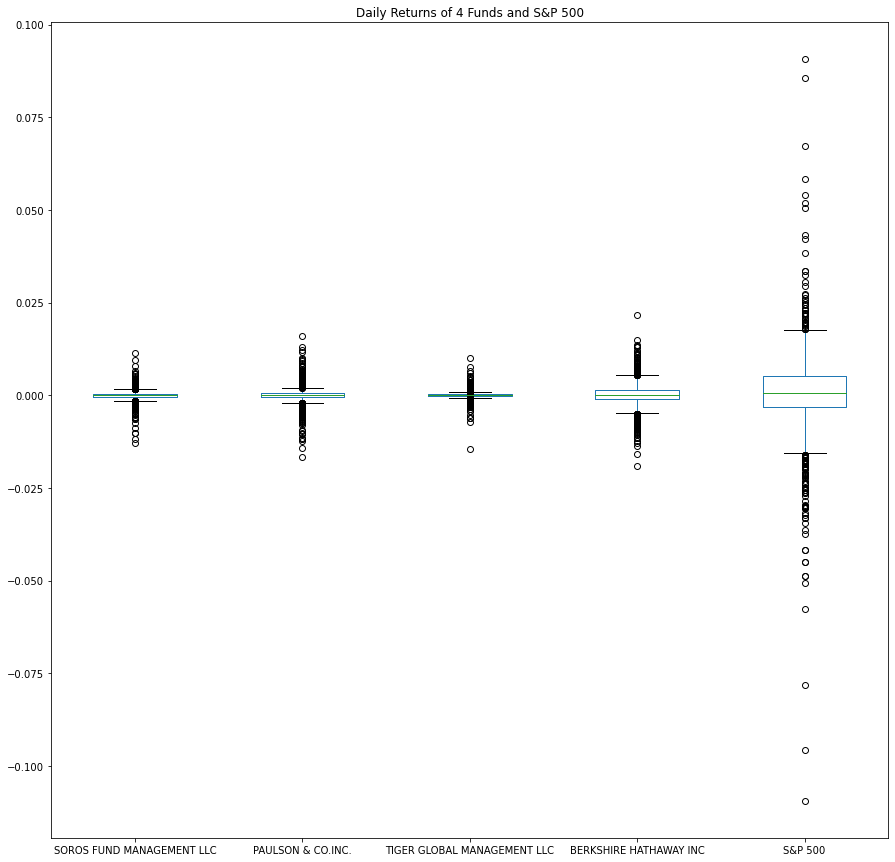

In [53]:
# Use the daily return data to create box plots to visualize the 
# volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns_df.plot(figsize=(15,15),
                      kind="box",
                      title="Daily Returns of 4 Funds and S&P 500")

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns of Non S&P 500'}>

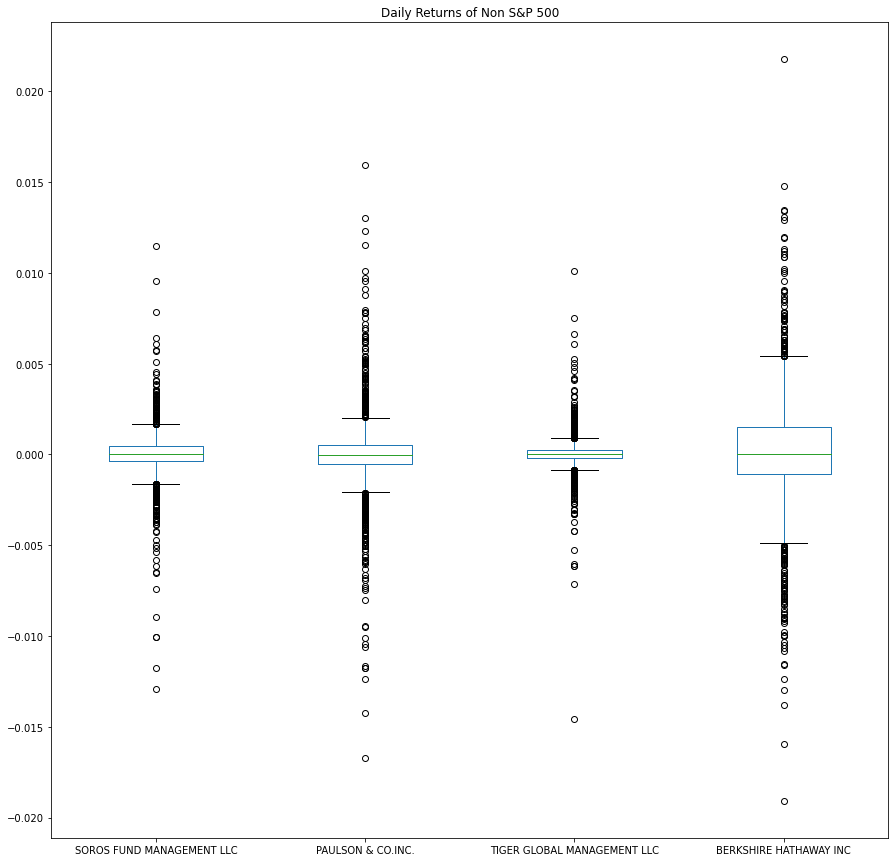

In [54]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
daily_returns_non_sp500_df = daily_returns_df.drop(columns=["S&P 500"])

daily_returns_non_sp500_df.plot(figsize=(15,15),
                              kind="box",
                              title="Daily Returns of Non S&P 500")

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # Berkshire Hathaway INC appears to be the most volatile and Tiger Global Management LLC appears to be the least volatile. Longest Box and longest whisker of Berkshire Hathaway INC indicates greatest volatility. The greatest extend of outliers beyond the whiskers also indicates and confirms greatest spread and most volatility. On the other hand Tiger Global Management LLC has the smallest box, shortest whisker and smallest extend of outliers beyond the whiskers indicates smallest spread and least volatility.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [14]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
standard_deviations = daily_returns_df.std()
standard_deviations_sorted = standard_deviations.sort_values()
standard_deviations_sorted

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [55]:
# Calculate and sort the annualized standard deviation 
# (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
annualized_standard_deviations = daily_returns_df.std() * np.sqrt(252)
annualized_standard_deviations_sorted = annualized_standard_deviations.sort_values()
annualized_standard_deviations_sorted

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21 Day Rolling Volatility of 4 Funds and S&P 500'}, xlabel='date'>

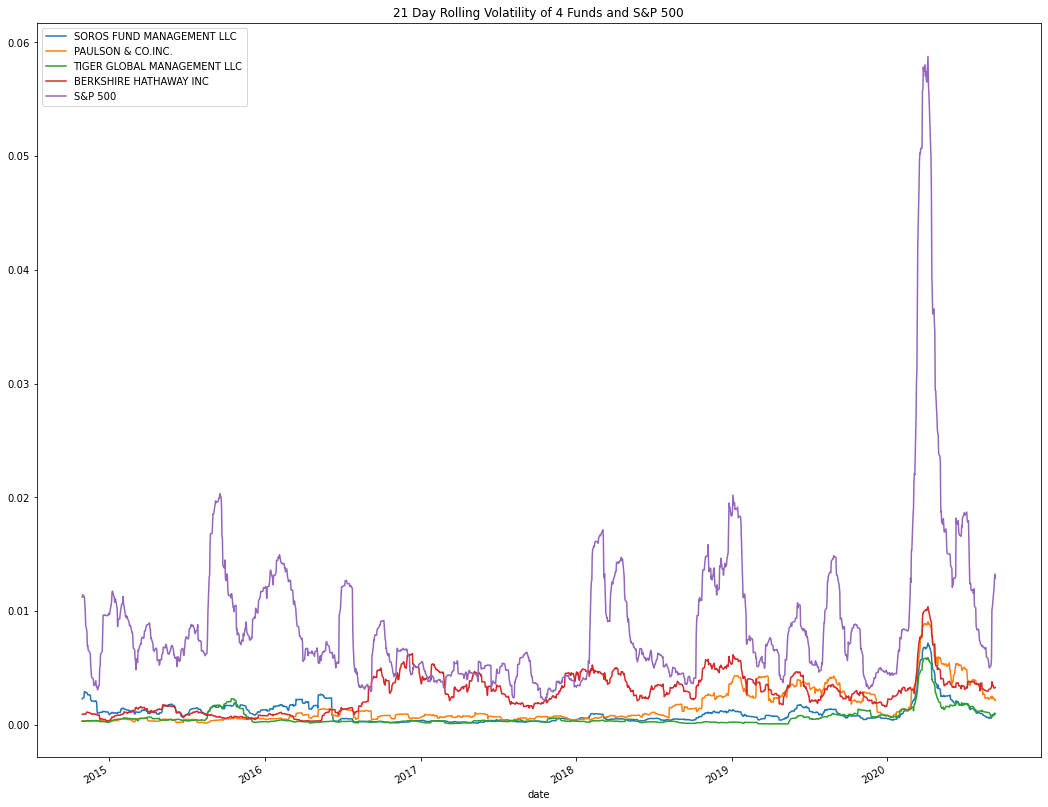

In [56]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns_df.rolling(window=21).std().plot(figsize=(18, 15),
                                               title="21 Day Rolling Volatility of 4 Funds and S&P 500")

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation of 4 Funds'}, xlabel='date'>

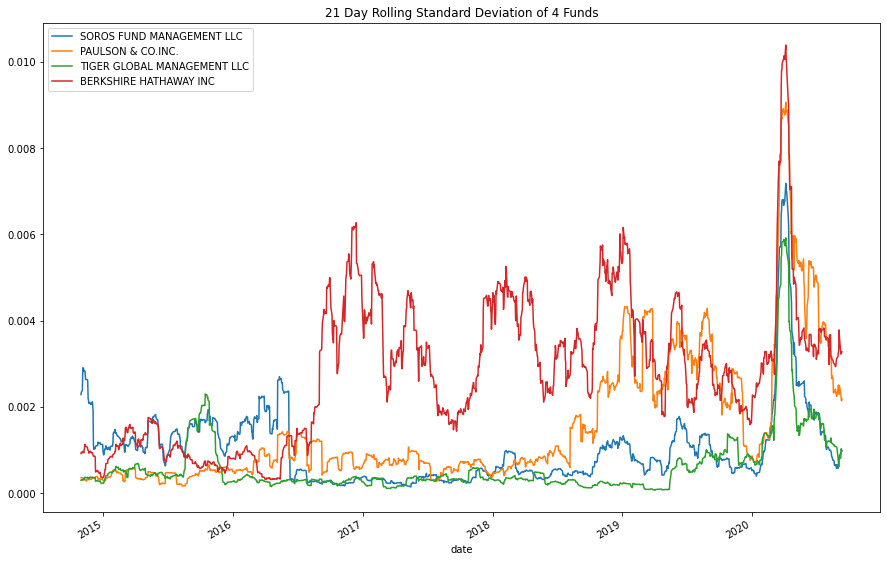

In [58]:
# Using the daily return data and a 21-day rolling window, 
# plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
daily_returns_non_sp500_df.rolling(window=21).std().plot(
                    figsize=(15, 10),
                    title="21 Day Rolling Standard Deviation of 4 Funds")

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** None of the 4 other portfolios pose more risk than S&P 500 based on the annualized standard deviation. S&P 500 poses the most risk out of all the portfolios under consideration. There was very small windows in 2017 in which Berkshire posed more risk than S&P 500.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** There is one time during the covid crisis when the risk of all the portfolios increases at the same time. At other times, some portfolios' (Soros, Paulson and Tiger) risk does not change even though the risk of S&P 500 increases. At some other times, some portfolios' (Berkshire) risk changes in step with S&P 500.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Berkshire Hathaway poses the mosk risk. Initially its riskiness was comparable to other portfolios but its riskiness increased in late 2016. There are instances when it is is less risk than some other portfolios but overall it is more risky than rest of the portfolios.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [18]:
# Calculate the annual average return data for the for fund portfolios 
# and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
annualized_average_returns = daily_returns_df.mean() * 252
annualized_average_returns_sorted = annualized_average_returns.sort_values()
annualized_average_returns_sorted

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [19]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios
# and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
annualized_sharpe_ratios = annualized_average_returns/annualized_standard_deviations
annualized_sharpe_ratios_sorted = annualized_sharpe_ratios.sort_values()
annualized_sharpe_ratios_sorted

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratios'}>

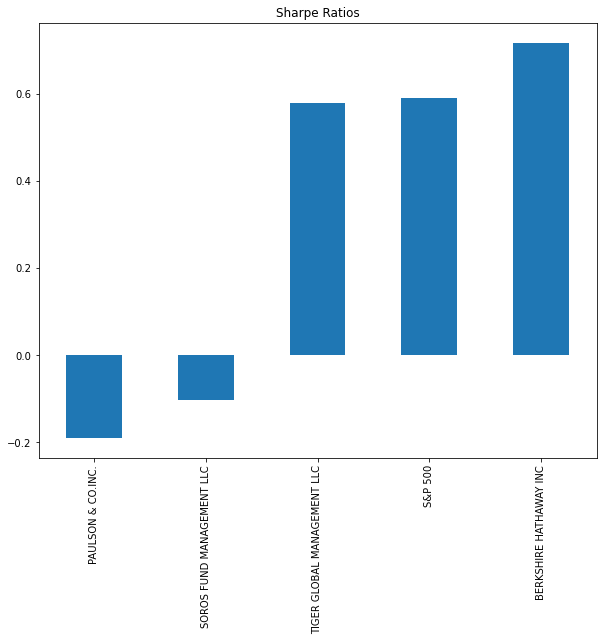

In [20]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
annualized_sharpe_ratios_sorted.plot(figsize=(10,8),
                                     kind="bar",
                                     title="Sharpe Ratios")

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # For the same amount of risk, Berkshire provides the best risk-return with an annualized sharpe ration of 0.72. It is even better than S&P 500 (annualized sharpe ratio of 0.59). Paulson offers the worst risk return providing a negative return for the same risk with an annualized sharpe ratio of -0.19. Sharpe ratio indicated excess return adjusted for risk. Higher the sharpe ratio, higher the return adjusted for the same amount of risk. So, Berkshire here offers the highest amount of return for the same amount of risk and Paulson offers the worst amount of return for the same amount of risk. 

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [59]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
rolling_sp500_variance = daily_returns_df['S&P 500'].rolling(window=60).var().dropna()

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [61]:
# Calculate the covariance using a 60-day rolling window 
# Using the best available sharpe ratios we pick Tiger as one of the non-s&p 500portfolios
rolling_tiger_covariance = daily_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns_df['S&P 500']).dropna()
display(rolling_tiger_covariance.tail())

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [30]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
rolling_tiger_beta = rolling_tiger_covariance / rolling_sp500_variance
display(rolling_tiger_beta.tail())

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [63]:
# Calculate the average of the 60-day rolling beta
tiger_average_beta = rolling_tiger_beta.mean()
display(f"Tiger's Average Beta is {tiger_average_beta:,.2f} ({tiger_average_beta})")

"Tiger's Average Beta is 0.03 (0.03093001487238774)"

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT LLC'}, xlabel='date'>

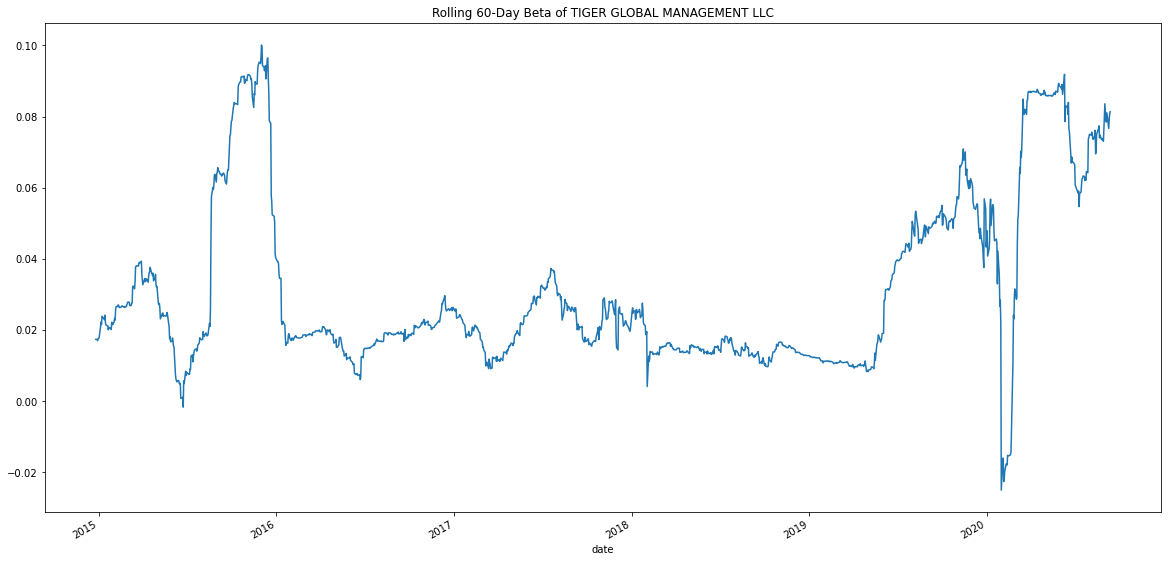

In [33]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
rolling_tiger_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of TIGER GLOBAL MANAGEMENT LLC')

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [68]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# Using sharpe ratio we pick Berkshire as one of the portfolios
rolling_berkshire_covariance = daily_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns_df['S&P 500'])
display("Rolling 60 day Berkshire Covariance is:",
        rolling_berkshire_covariance.tail())

'Rolling 60 day Berkshire Covariance is:'

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [69]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_sp500_variance
display("The 60 day rolling Berkshire Beta is:", 
        rolling_berkshire_beta.tail())

'The 60 day rolling Berkshire Beta is:'

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [66]:
# Calculate the average of the 60-day rolling beta
berkshire_average_beta = rolling_berkshire_beta.mean()

display(f"Berkshire's Average Beta is {berkshire_average_beta:,.2f} ({berkshire_average_beta})")

"Berkshire's Average Beta is 0.22 (0.2214986101354593)"

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='date'>

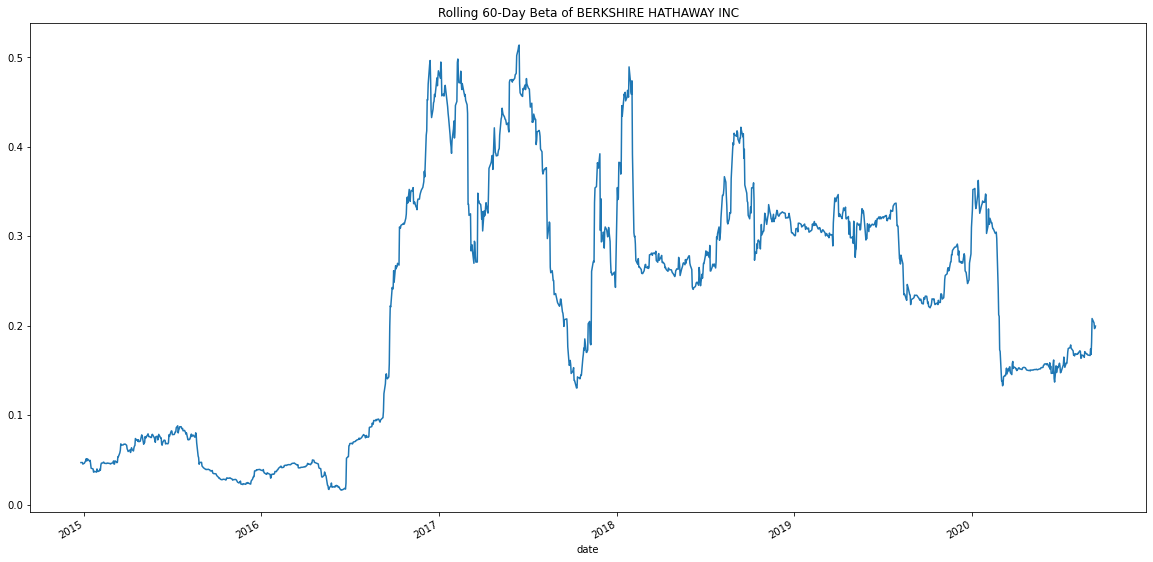

In [37]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
rolling_berkshire_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

In [79]:
correlation_df = daily_returns_df.drop(
                    columns=['PAULSON & CO.INC.', 'SOROS FUND MANAGEMENT LLC'])
price_correlation = correlation_df.corr()
display(price_correlation)

,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
TIGER GLOBAL MANAGEMENT LLC,1.000000,0.429551,0.661494
BERKSHIRE HATHAWAY INC,0.429551,1.000000,0.608083
S&P 500,0.661494,0.608083,1.000000


In [75]:
correlation_df.corr('kendall')

,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
TIGER GLOBAL MANAGEMENT LLC,1.000000,0.338217,0.362457
BERKSHIRE HATHAWAY INC,0.338217,1.000000,0.414425
S&P 500,0.362457,0.414425,1.000000


In [104]:
# Treynor Measure calculation
# Measures execess return per unit of systematic risk
variance_sp500 = daily_returns_df['S&P 500'].var()
covariance_tiger = daily_returns_df['TIGER GLOBAL MANAGEMENT LLC'].cov(daily_returns_df['S&P 500'])
covariance_berkshire = daily_returns_df['BERKSHIRE HATHAWAY INC'].cov(daily_returns_df['S&P 500'])

beta_tiger = covariance_tiger / variance_sp500
beta_berkshire = covariance_berkshire / variance_sp500 

average_returns = daily_returns_df.mean()

treynor_measure_tiger = average_returns['TIGER GLOBAL MANAGEMENT LLC']/beta_tiger
treynor_measure_berkshire = average_returns['BERKSHIRE HATHAWAY INC']/beta_berkshire
print(f"Beta for Tiger is               : {beta_tiger:,.2f}\n"
      f"Beta for Berkshire is           : {beta_berkshire:,.2f}\n"
      f"Treynor measure for Tiger is    : {treynor_measure_tiger:,.8f} and\n"
      f"Treynor measure for Berkshire is: {treynor_measure_berkshire:,.8f}")

Beta for Tiger is               : 0.06
Beta for Berkshire is           : 0.17
Treynor measure for Tiger is    : 0.00063683 and
Treynor measure for Berkshire is: 0.00085849


In [111]:
# Information Ratio calculation
# Information ratio is alpha/tracking error
# Measures abnormal return per unit of non systematic risk

return_difference_tiger = daily_returns_df['TIGER GLOBAL MANAGEMENT LLC'] - daily_returns_df['S&P 500']
tracking_error_tiger = return_difference_tiger.dropna().std()
return_difference_berkshire = daily_returns_df['BERKSHIRE HATHAWAY INC'] - daily_returns_df['S&P 500']
tracking_error_berkshire = return_difference_berkshire.dropna().std()
alpha_tiger = (average_returns['TIGER GLOBAL MANAGEMENT LLC']
                           - average_returns['S&P 500'])
alpha_berkshire = (average_returns['BERKSHIRE HATHAWAY INC']
                               - average_returns['S&P 500'])
information_ratio_tiger = alpha_tiger/tracking_error_tiger
information_ratio_berkshire = alpha_berkshire/tracking_error_berkshire
print(f"Tracking error for Tiger     is   : {tracking_error_tiger:.8f}\n"
      f"Tracking error for Berkshire is   : {tracking_error_berkshire:.8f}\n"
      f"Information Ratio for Tiger is    : {information_ratio_tiger:,.8f} and\n"
      f"Information Ratio for Berkshire is: {information_ratio_berkshire:,.8f}")

Tracking error for Tiger     is   : 0.01091662
Tracking error for Berkshire is   : 0.00991255
Information Ratio for Tiger is    : -0.03596944 and
Information Ratio for Berkshire is: -0.02842816


In [119]:
final_analysis_df = pd.DataFrame(
                    {"Tiger":[0, 0, 0, 0, 0, 0, 0],
                     "Berkshire":[0, 0, 0, 0, 0, 0, 0]},
                      index = ['Average Return',
                               'Sharpe Ratio',
                               'Alpha',
                               'Beta',
                               'Treynor',
                               'Tracking Error',
                               'Information Ratio'],
                      columns = ['Tiger Global', 'Berkshire Hathaway'])
final_analysis_df['Tiger Global']['Average Return'] = average_returns['TIGER GLOBAL MANAGEMENT LLC']
final_analysis_df['Tiger Global']['Sharpe Ratio'] = annualized_sharpe_ratios['TIGER GLOBAL MANAGEMENT LLC']
final_analysis_df['Tiger Global']['Alpha'] = alpha_tiger
final_analysis_df['Tiger Global']['Beta'] = beta_tiger
final_analysis_df['Tiger Global']['Treynor'] = treynor_measure_tiger
final_analysis_df['Tiger Global']['Tracking Error'] = tracking_error_tiger
final_analysis_df['Tiger Global']['Information Ratio'] = information_ratio_tiger

final_analysis_df['Berkshire Hathaway']['Average Return'] = average_returns['BERKSHIRE HATHAWAY INC']
final_analysis_df['Berkshire Hathaway']['Sharpe Ratio'] = annualized_sharpe_ratios['BERKSHIRE HATHAWAY INC']
final_analysis_df['Berkshire Hathaway']['Alpha'] = alpha_berkshire
final_analysis_df['Berkshire Hathaway']['Beta'] = beta_berkshire
final_analysis_df['Berkshire Hathaway']['Treynor'] = treynor_measure_berkshire
final_analysis_df['Berkshire Hathaway']['Tracking Error'] = tracking_error_berkshire
final_analysis_df['Berkshire Hathaway']['Information Ratio'] = information_ratio_berkshire

final_analysis_df

,Tiger Global,Berkshire Hathaway
Average Return,0.000036,0.000147
Sharpe Ratio,0.579002,0.717512
Alpha,-0.000393,-0.000282
Beta,0.057021,0.171443
Treynor,0.000637,0.000858
Tracking Error,0.010917,0.009913
Information Ratio,-0.035969,-0.028428


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # Berkshire with its higher rolling Beta seems to be more sensitive to the movements in the S&P 500 especially after late 2016 


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # Past performance is not indicative of future performance. But if we need to pick a portfolio based on past performance, we need to see if the portfolio we are going to pick is going to be the entire investment fund or part of an existing portfolio. 

If the portfolio we pick is going to be the entire investment fund, Berkshire would be preferable because of a higher sharpe ratio which measures the excesss return (reward) to total risk (systematic and nonsystematic). So, essentially if past performance indicates future performance, Berkshire has a better potential for producing excess return for same total risk/volatility than Tiger. 

If the portfolio we pick is going to be a subportfolio of our investment fund, which includes other non-S&P 500 portfolios, we need to look at the Treynor Measure which measures the execess return per systematic risk (since the non systematic risk would be diversified away in the presence of other portfolios). The Treynor measure of Berkshire is higher than Tiger. So, Berkshire will produce more return per unit of systematic risk and will contribute more to the overall portfolio.   

If the active portfolio we pick is going to be mixed with S&P 500 index portfolio, we need to look at the information ratio which measures abnormal return or alpha (in reference to the benchmark S&P 500 index) per unit of non systematic risk. It is negative for both because they both underperform the market or the S&P 500. But the information ratio for Berkshire is greater than Tiger's. So, Berkshire will contribute more to this portfolio with its nonsystematic risk getting diversified by holding the S&P 500 index.

So overall, Berkshire will be a better bet when chosing a portfolio in any given scenario. 

If the user is not concerned about return and mostly concerned about reducing risk, they could opt for the Tiger portfolio. Based on Beta only, Tiger has a much lower average Beta and much lower rolling Beta than Berkshire. Lower Beta indicates lower volatility vis a vis the S&P 500 as compared to Berkshire and less sensitivity to S&P500. So, Tiger is adding lower risk as compared to Berkshire and still has a comparable sharpe ratio as Berkshire. Therefore Tiger could be included in the portfolio to get equivalent returns for a much lower risk. Please bear in mind that both Beta and sharpe ratio are not forward looking measures. They account for the historical/past performance and historic perfomance may not necessarily reflect the future performance. Kendall correlation (Since Pearson or default correlation relies on normality, it is preferable to use kendal correlation which is more robust) indicates that Berkshire daily returns are more correlated with the market as compared to the Tiger daily returns which is what the Beta also indicates. So, Tiger could add diversification value to the portfolio in the form of reducing risk. 

---